### Alk experiments: experiment - control

In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import os
from glob import glob
from collections import OrderedDict
import xarray as xr
import numpy as np

import ncar_jobqueue
from dask.distributed import Client

import matplotlib.pyplot as plt
import cartopy
import cartopy.crs as ccrs
from scipy import stats
import pop_tools 
import pandas as pd
import cftime
import matplotlib.colors as colors
import utils

xr.set_options(keep_attrs=True);

In [2]:
case_exp = 'b.e21.BSSP245.f09_g17.ccisens-c25loae5gtco2-final.esmfirebvoc.001'
case_ctrl = 'b.e21.BSSP245.f09_g17.ccisens-const25lu-final.esmfirebvoc.001'

user = 'lawrence'

start_yr = 2091
num_years = 10
endyr = start_yr + num_years 

In [3]:
files = []
for year in range(start_yr,endyr):
    yr4="{:04d}".format(year)
    print('doing simulation year', year, '!')
    for month in range(1, 13):
    
        mo2="{:02d}".format(month)
        files.extend(sorted(glob(f'/glade/campaign/cgd/tss/lawrence/ccisensarchive/{case_exp}/ocn/hist/{case_exp}.pop.h.{yr4}-{mo2}.nc')))

ds_mon_exp = xr.open_mfdataset(files,decode_times=True,decode_coords=False, concat_dim='time')

doing simulation year 2091 !
doing simulation year 2092 !
doing simulation year 2093 !
doing simulation year 2094 !
doing simulation year 2095 !
doing simulation year 2096 !
doing simulation year 2097 !
doing simulation year 2098 !
doing simulation year 2099 !
doing simulation year 2100 !


In [4]:
files = []
for year in range(start_yr,endyr):
    yr4="{:04d}".format(year)
    print('doing simulation year', year, '!')
    for month in range(1, 13):
    
        mo2="{:02d}".format(month)
        files.extend(sorted(glob(f'/glade/campaign/cgd/tss/lawrence/ccisensarchive/{case_ctrl}/ocn/hist/{case_ctrl}.pop.h.{yr4}-{mo2}.nc')))

ds_mon_ctrl = xr.open_mfdataset(files,decode_times=True,decode_coords=False, concat_dim='time')

doing simulation year 2091 !
doing simulation year 2092 !
doing simulation year 2093 !
doing simulation year 2094 !
doing simulation year 2095 !
doing simulation year 2096 !
doing simulation year 2097 !
doing simulation year 2098 !
doing simulation year 2099 !
doing simulation year 2100 !


###  grab desired variables

In [5]:
variables = ['PH', 'ALK','co3_sat_arag','HCO3','H2CO3','CO3','DIC','CaCO3_PROD_zint_100m','pCO2SURF','coccoC','coccoCaCO3','diatC']

In [6]:
keepthese=['z_t','z_t_150m','time_bound','time','TAREA','REGION_MASK','dz','KMT','TLAT','TLONG'] + variables
ds_mon_exp = ds_mon_exp.drop([v for v in ds_mon_exp.variables if v not in keepthese])

In [7]:
ds_mon_ctrl = ds_mon_ctrl.drop([v for v in ds_mon_ctrl.variables if v not in keepthese])

### Monthly clim

In [8]:
ds_mon_ctrl["time"] = ds_mon_ctrl.time_bound.compute().mean(dim="d2")
ds_mon_ctrl = ds_mon_ctrl.groupby('time.month').mean('time')

ds_mon_exp["time"] = ds_mon_exp.time_bound.compute().mean(dim="d2")
ds_mon_exp = ds_mon_exp.groupby('time.month').mean('time')

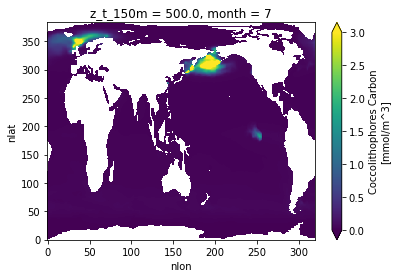

In [9]:
ds_mon_ctrl['coccoC'].isel(month=6,z_t_150m=0).plot(vmin=0,vmax=3)

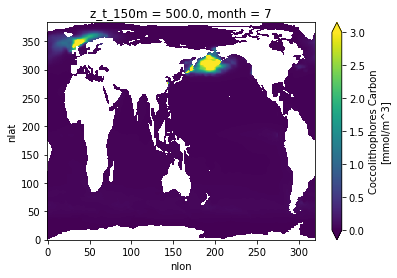

In [10]:
ds_mon_exp['coccoC'].isel(month=6,z_t_150m=0).plot(vmin=0,vmax=3)

### annual mean

In [11]:
ds_ann_exp = ds_mon_exp.mean(dim='month')
ds_ann_ctrl = ds_mon_ctrl.mean(dim='month')

In [12]:
ds_ann_ctrl

<xarray.Dataset>
Dimensions:               (nlat: 384, nlon: 320, z_t: 60, z_t_150m: 15)
Coordinates:
  * z_t                   (z_t) float32 500.0 1.5e+03 ... 5.125e+05 5.375e+05
  * z_t_150m              (z_t_150m) float32 500.0 1.5e+03 ... 1.35e+04 1.45e+04
Dimensions without coordinates: nlat, nlon
Data variables: (12/18)
    dz                    (z_t) float32 dask.array<chunksize=(60,), meta=np.ndarray>
    TLONG                 (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    TLAT                  (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    KMT                   (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    REGION_MASK           (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    TAREA                 (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    ...                    ...
    PH                    (nlat, nlon) float32 dask.array<chunksize=(384, 320), meta=np.ndarray>
    DIC                   (z_t, nlat, nlon) float32 dask.array<chunksize=(60, 384, 320), meta=np.ndarray>
    ALK                   (z_t, nlat, nlon) float32 dask.array<chunksize=(60, 384, 320), meta=np.ndarray>
    diatC                 (z_t_150m, nlat, nlon) float32 dask.array<chunksize=(15, 384, 320), meta=np.ndarray>
    coccoC                (z_t_150m, nlat, nlon) float32 dask.array<chunksize=(15, 384, 320), meta=np.ndarray>
    coccoCaCO3            (z_t_150m, nlat, nlon) float32 dask.array<chunksize=(15, 384, 320), meta=np.ndarray>
Attributes:
    title:             b.e21.BSSP245.f09_g17.ccisens-const25lu-final.esmfireb...
    history:           none
    Conventions:       CF-1.0; http://www.cgd.ucar.edu/cms/eaton/netcdf/CF-cu...
    time_period_freq:  month_1
    model_doi_url:     https://doi.org/10.5065/D67H1H0V
    contents:          Diagnostic and Prognostic Variables
    source:            CCSM POP2, the CCSM Ocean Component
    revision:          $Id$
    calendar:          All years have exactly  365 days.
    start_time:        This dataset was created on 2025-08-20 at 19:14:42.6
    cell_methods:      cell_methods = time: mean ==> the variable values are ...

### get coords

In [13]:
ds_grid = pop_tools.get_grid('POP_gx1v7')
lats = ds_grid.TLAT
lons = ds_grid.TLONG
area = ds_grid.TAREA
area_m = area * 1.e-4
area_km = area * 1.e-10
lons_norm = utils.normal_lons(lons)

In [14]:
def get_ClusterClient():
    import dask
    from dask_jobqueue import PBSCluster
    from dask.distributed import Client
    cluster = PBSCluster(
        cores=2,
        memory='20 GB',
        processes=1,
        queue='casper',
        resource_spec='select=1:ncpus=1:mem=20GB',
        project='NCGD0011',
        walltime='02:00:00',
        interface='ext',)

    dask.config.set({
        'distributed.dashboard.link':
        'https://jupyterhub.hpc.ucar.edu/stable/user/{USER}/proxy/{port}/status'
    })
    client = Client(cluster)
    return cluster, client

In [15]:
cluster, client = get_ClusterClient()
cluster.scale(12) 
client

<Client: 'tcp://128.117.208.175:33993' processes=0 threads=0, memory=0 B>

In [16]:
%%time

ds_ann_exp = ds_ann_exp.load()

CPU times: user 10.4 s, sys: 1.22 s, total: 11.7 s
Wall time: 1min 9s


In [17]:
%%time

ds_ann_ctrl = ds_ann_ctrl.load()

CPU times: user 5.65 s, sys: 445 ms, total: 6.1 s
Wall time: 20.3 s


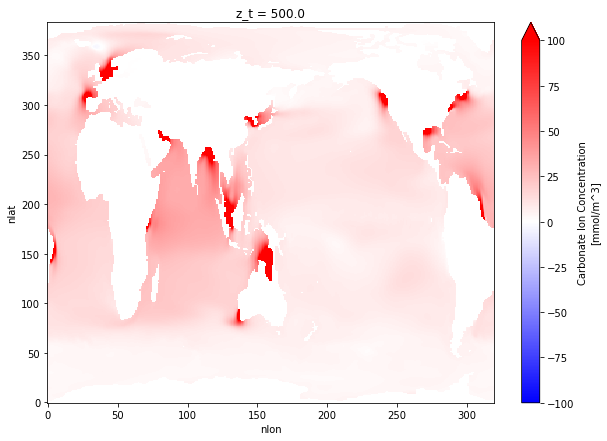

In [18]:
(ds_ann_exp.CO3.isel(z_t=0) - ds_ann_ctrl.CO3.isel(z_t=0)).plot(figsize=(10,7), 
                                                                  vmin=-100,vmax=100, 
                                                                 cmap='bwr')

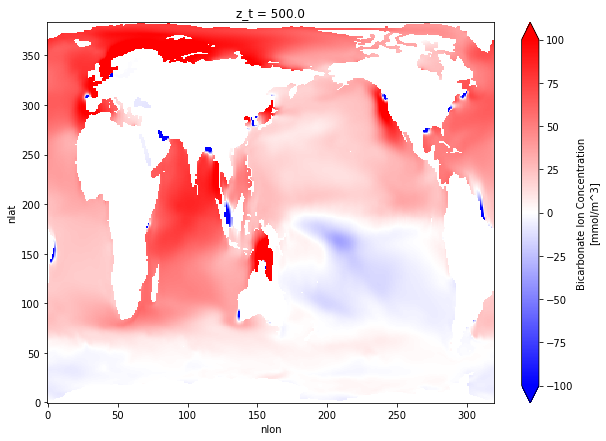

In [19]:
(ds_ann_exp.HCO3.isel(z_t=0) - ds_ann_ctrl.HCO3.isel(z_t=0)).plot(figsize=(10,7), 
                                                                  vmin=-100,vmax=100, 
                                                                 cmap='bwr')

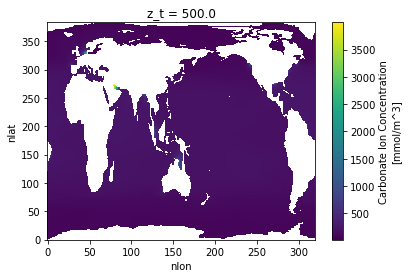

In [20]:
ds_ann_exp.CO3.isel(z_t=0).plot()

### Plot mean Omega aragonite and pH

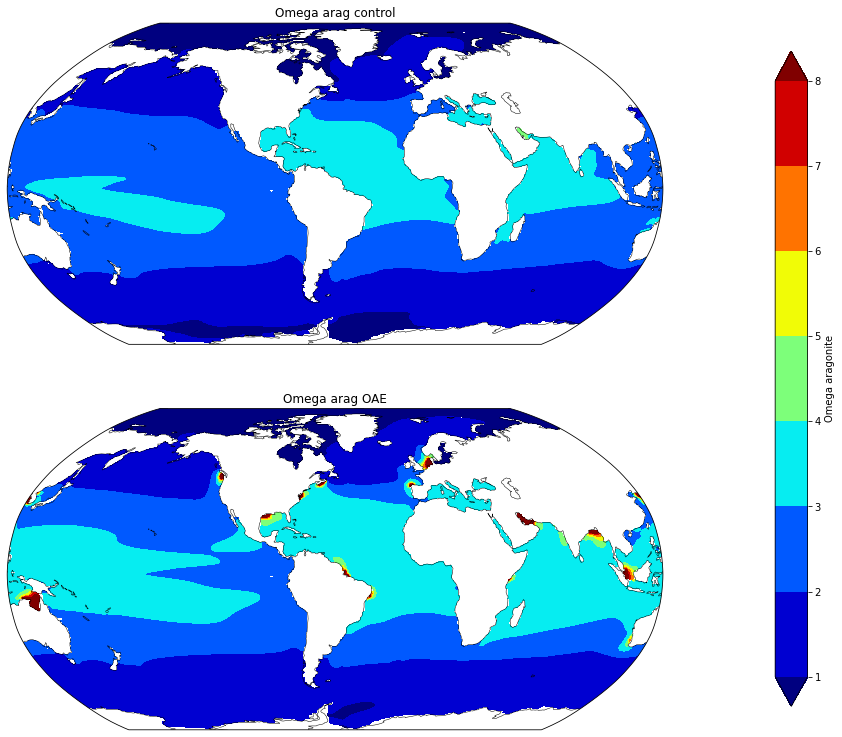

In [21]:
fig = plt.figure(figsize=(15,13))
    
ax = fig.add_subplot(2,1,1, projection=ccrs.Robinson(central_longitude=305.0))
ax.set_title('Omega arag control', fontsize=12)
tmp = (ds_ann_ctrl.CO3.isel(z_t=0)/ds_ann_ctrl.co3_sat_arag.isel(z_t=0))
lon, lat, field = utils.adjust_pop_grid(lons, lats,  tmp)
pc=ax.contourf(lon, lat, field, cmap='jet',
               #vmin=0,vmax=5,
               levels=[1,2,3,4,5,6,7,8],extend='both',
               transform=ccrs.PlateCarree())
ax.coastlines('110m',linewidth=0.5)

ax = fig.add_subplot(2,1,2, projection=ccrs.Robinson(central_longitude=305.0))
ax.set_title('Omega arag OAE', fontsize=12)
tmp = (ds_ann_exp.CO3.isel(z_t=0)/ds_ann_exp.co3_sat_arag.isel(z_t=0))
lon, lat, field = utils.adjust_pop_grid(lons, lats,  tmp)
#pc=ax.pcolormesh(lon, lat, field, cmap='jet',vmin=0,vmax=5,transform=ccrs.PlateCarree())
pc=ax.contourf(lon, lat, field, cmap='jet',
               #vmin=0,vmax=5,
               levels=[1,2,3,4,5,6,7,8],extend='both',
               transform=ccrs.PlateCarree())
ax.coastlines('110m',linewidth=0.5)

cbar_ax = fig.add_axes([0.92, 0.15, 0.03, 0.7])
fig.colorbar(pc, cax=cbar_ax,extend='max', label='Omega aragonite');

fig.savefig('/glade/work/kristenk/figs/OAE_fig_Omega.png', bbox_inches='tight', dpi=300, format='png');

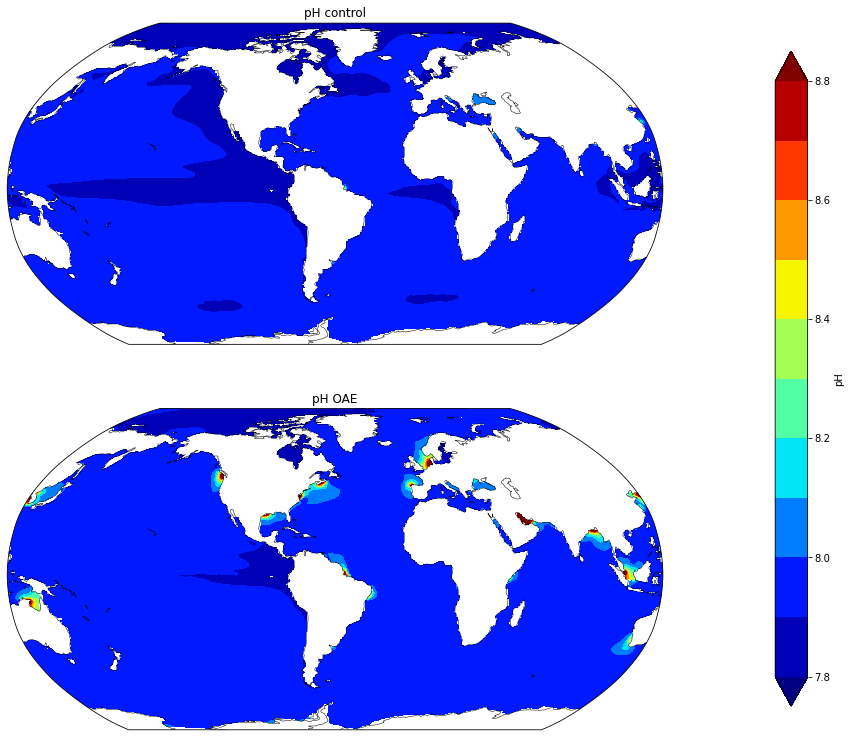

In [22]:
fig = plt.figure(figsize=(15,13))

levels = np.arange(7.8,8.8,0.1)

ax = fig.add_subplot(2,1,1, projection=ccrs.Robinson(central_longitude=305.0))
ax.set_title('pH control', fontsize=12)
tmp = ds_ann_ctrl.PH
lon, lat, field = utils.adjust_pop_grid(lons, lats,  tmp)
pc=ax.contourf(lon, lat, field, cmap='jet',
               #vmin=0,vmax=5,
               levels=levels,extend='both',
               transform=ccrs.PlateCarree())
ax.coastlines('110m',linewidth=0.5)

ax = fig.add_subplot(2,1,2, projection=ccrs.Robinson(central_longitude=305.0))
ax.set_title('pH OAE', fontsize=12)
tmp = ds_ann_exp.PH
lon, lat, field = utils.adjust_pop_grid(lons, lats,  tmp)
#pc=ax.pcolormesh(lon, lat, field, cmap='jet',vmin=0,vmax=5,transform=ccrs.PlateCarree())
pc=ax.contourf(lon, lat, field, cmap='jet',
               #vmin=0,vmax=5,
               levels=levels,extend='both',
               transform=ccrs.PlateCarree())
ax.coastlines('110m',linewidth=0.5)

cbar_ax = fig.add_axes([0.92, 0.15, 0.03, 0.7])
fig.colorbar(pc, cax=cbar_ax,extend='max', label='pH');

fig.savefig('/glade/work/kristenk/figs/OAE_fig_pH.png', bbox_inches='tight', dpi=300, format='png');

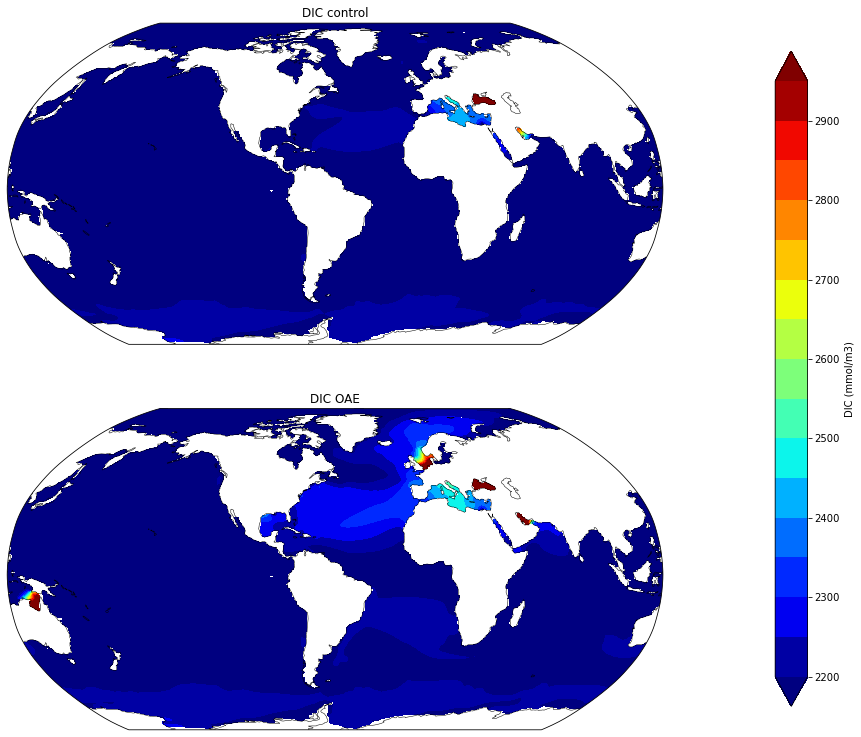

In [23]:
fig = plt.figure(figsize=(15,13))

levels = np.arange(2200,3000,50)

ax = fig.add_subplot(2,1,1, projection=ccrs.Robinson(central_longitude=305.0))
ax.set_title('DIC control', fontsize=12)
tmp = ds_ann_ctrl.DIC.isel(z_t=0)
lon, lat, field = utils.adjust_pop_grid(lons, lats,  tmp)
pc=ax.contourf(lon, lat, field, cmap='jet',
               #vmin=0,vmax=5,
               levels=levels,extend='both',
               transform=ccrs.PlateCarree())
ax.coastlines('110m',linewidth=0.5)

ax = fig.add_subplot(2,1,2, projection=ccrs.Robinson(central_longitude=305.0))
ax.set_title('DIC OAE', fontsize=12)
tmp = ds_ann_exp.DIC.isel(z_t=0)
lon, lat, field = utils.adjust_pop_grid(lons, lats,  tmp)
#pc=ax.pcolormesh(lon, lat, field, cmap='jet',vmin=0,vmax=5,transform=ccrs.PlateCarree())
pc=ax.contourf(lon, lat, field, cmap='jet',
               #vmin=0,vmax=5,
               levels=levels,extend='both',
               transform=ccrs.PlateCarree())
ax.coastlines('110m',linewidth=0.5)

cbar_ax = fig.add_axes([0.92, 0.15, 0.03, 0.7])
fig.colorbar(pc, cax=cbar_ax,extend='max', label='DIC (mmol/m3)');

fig.savefig('/glade/work/kristenk/figs/OAE_fig_DIC.png', bbox_inches='tight', dpi=300, format='png');

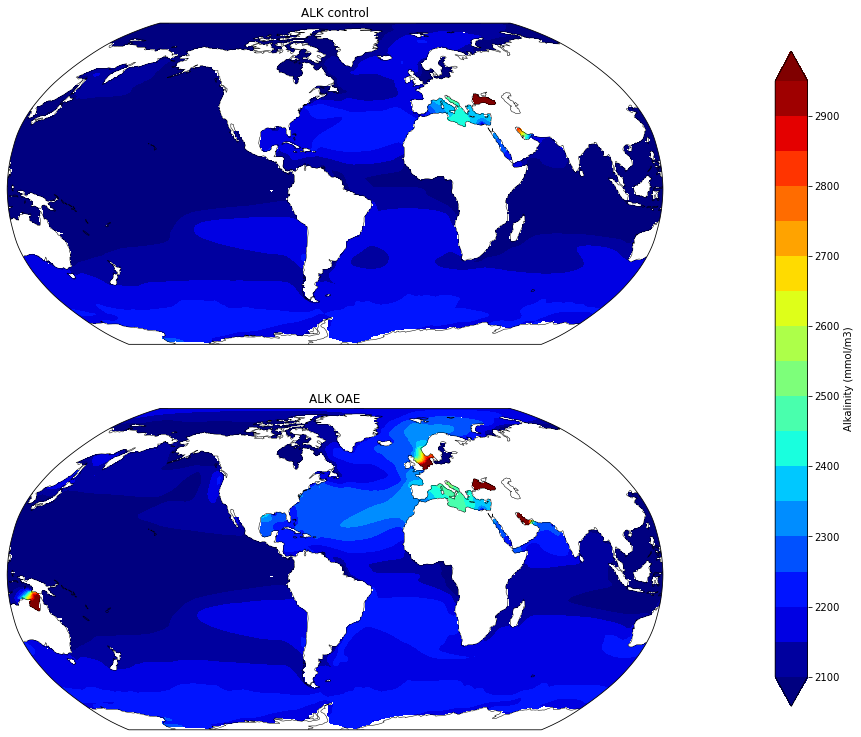

In [24]:
fig = plt.figure(figsize=(15,13))

levels = np.arange(2100,3000,50)

ax = fig.add_subplot(2,1,1, projection=ccrs.Robinson(central_longitude=305.0))
ax.set_title('ALK control', fontsize=12)
tmp = ds_ann_ctrl.DIC.isel(z_t=0)
lon, lat, field = utils.adjust_pop_grid(lons, lats,  tmp)
pc=ax.contourf(lon, lat, field, cmap='jet',
               #vmin=0,vmax=5,
               levels=levels,extend='both',
               transform=ccrs.PlateCarree())
ax.coastlines('110m',linewidth=0.5)

ax = fig.add_subplot(2,1,2, projection=ccrs.Robinson(central_longitude=305.0))
ax.set_title('ALK OAE', fontsize=12)
tmp = ds_ann_exp.DIC.isel(z_t=0)
lon, lat, field = utils.adjust_pop_grid(lons, lats,  tmp)
#pc=ax.pcolormesh(lon, lat, field, cmap='jet',vmin=0,vmax=5,transform=ccrs.PlateCarree())
pc=ax.contourf(lon, lat, field, cmap='jet',
               #vmin=0,vmax=5,
               levels=levels,extend='both',
               transform=ccrs.PlateCarree())
ax.coastlines('110m',linewidth=0.5)

cbar_ax = fig.add_axes([0.92, 0.15, 0.03, 0.7])
fig.colorbar(pc, cax=cbar_ax,extend='max', label='Alkalinity (mmol/m3)');

fig.savefig('/glade/work/kristenk/figs/OAE_fig_ALK.png', bbox_inches='tight', dpi=300, format='png');

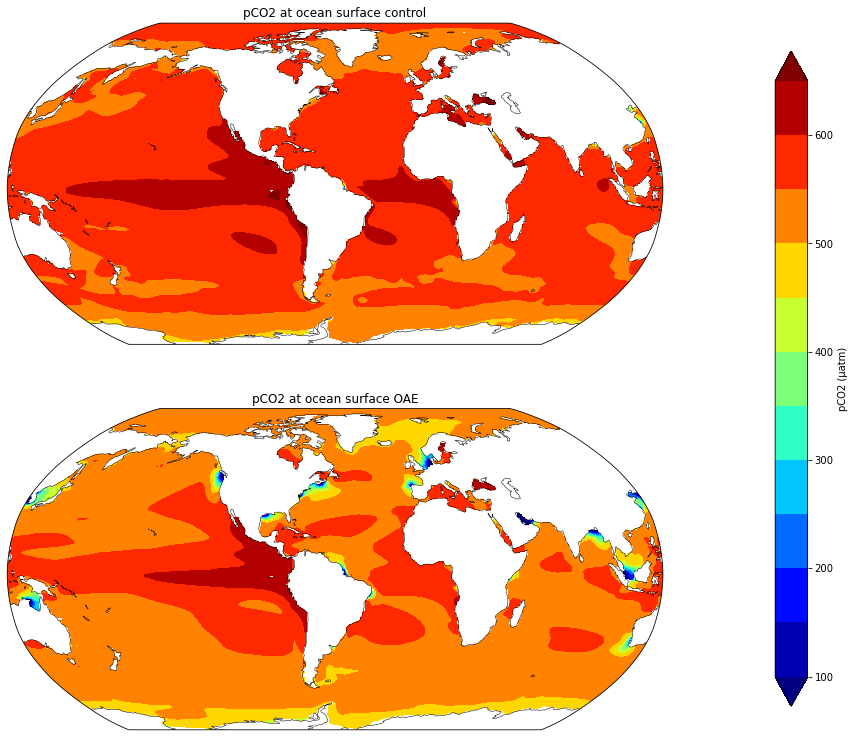

In [25]:
fig = plt.figure(figsize=(15,13))

levels = np.arange(100,700,50)

ax = fig.add_subplot(2,1,1, projection=ccrs.Robinson(central_longitude=305.0))
ax.set_title('pCO2 at ocean surface control', fontsize=12)
tmp = ds_ann_ctrl.pCO2SURF
lon, lat, field = utils.adjust_pop_grid(lons, lats,  tmp)
pc=ax.contourf(lon, lat, field, cmap='jet',
               #vmin=0,vmax=5,
               levels=levels,extend='both',
               transform=ccrs.PlateCarree())
ax.coastlines('110m',linewidth=0.5)

ax = fig.add_subplot(2,1,2, projection=ccrs.Robinson(central_longitude=305.0))
ax.set_title('pCO2 at ocean surface OAE', fontsize=12)
tmp = ds_ann_exp.pCO2SURF
lon, lat, field = utils.adjust_pop_grid(lons, lats,  tmp)
#pc=ax.pcolormesh(lon, lat, field, cmap='jet',vmin=0,vmax=5,transform=ccrs.PlateCarree())
pc=ax.contourf(lon, lat, field, cmap='jet',
               #vmin=0,vmax=5,
               levels=levels,extend='both',
               transform=ccrs.PlateCarree())
ax.coastlines('110m',linewidth=0.5)

cbar_ax = fig.add_axes([0.92, 0.15, 0.03, 0.7])
fig.colorbar(pc, cax=cbar_ax,extend='max', label='pCO2 (µatm)');

fig.savefig('/glade/work/kristenk/figs/OAE_fig_pCO2.png', bbox_inches='tight', dpi=300, format='png');

## PERSIAN GULF ZOOM IN

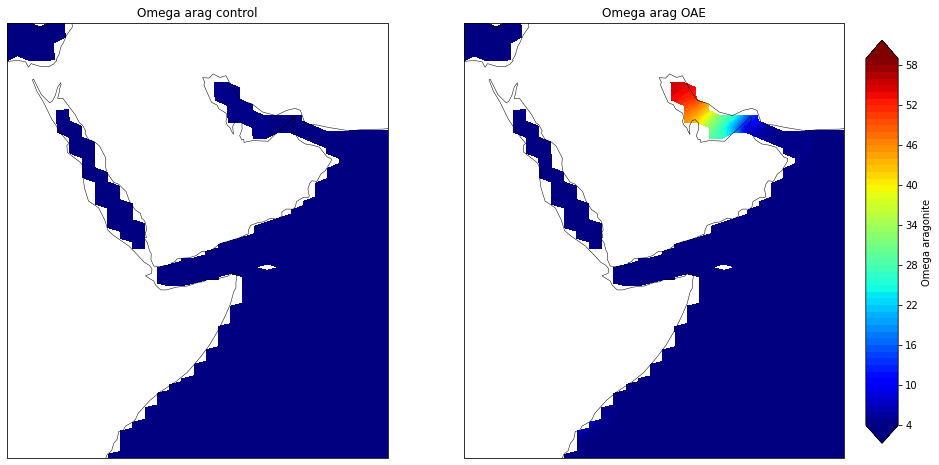

In [26]:
fig = plt.figure(figsize=(15,8))

############### Omega 
levels = np.arange(4,60,1)
extent = [30, 65, -5, 35]
ax = fig.add_subplot(1,2,1, projection=ccrs.PlateCarree())
ax.set_extent(extent, ccrs.PlateCarree())
ax.set_title('Omega arag control', fontsize=12)
tmp = (ds_ann_ctrl.CO3.isel(z_t=0)/ds_ann_ctrl.co3_sat_arag.isel(z_t=0))
lon, lat, field = utils.adjust_pop_grid(lons, lats,  tmp)
pc=ax.contourf(lon, lat, field, cmap='jet',
               #vmin=0,vmax=5,
               levels=levels,extend='both',
               transform=ccrs.PlateCarree())
ax.coastlines('110m',linewidth=0.5)

ax = fig.add_subplot(1,2,2, projection=ccrs.PlateCarree())
ax.set_extent(extent, ccrs.PlateCarree())
ax.set_title('Omega arag OAE', fontsize=12)
tmp = (ds_ann_exp.CO3.isel(z_t=0)/ds_ann_exp.co3_sat_arag.isel(z_t=0))
lon, lat, field = utils.adjust_pop_grid(lons, lats,  tmp)
#pc=ax.pcolormesh(lon, lat, field, cmap='jet',vmin=0,vmax=5,transform=ccrs.PlateCarree())
pc=ax.contourf(lon, lat, field, cmap='jet',
               #vmin=0,vmax=5,
               levels=levels,extend='both',
               transform=ccrs.PlateCarree())
ax.coastlines('110m',linewidth=0.5)

cbar_ax = fig.add_axes([0.92, 0.15, 0.03, 0.7])
fig.colorbar(pc, cax=cbar_ax,extend='max', label='Omega aragonite');

fig.savefig('/glade/work/kristenk/figs/OAE_fig_Persian_gulf_Omega.png', bbox_inches='tight', dpi=300, format='png');

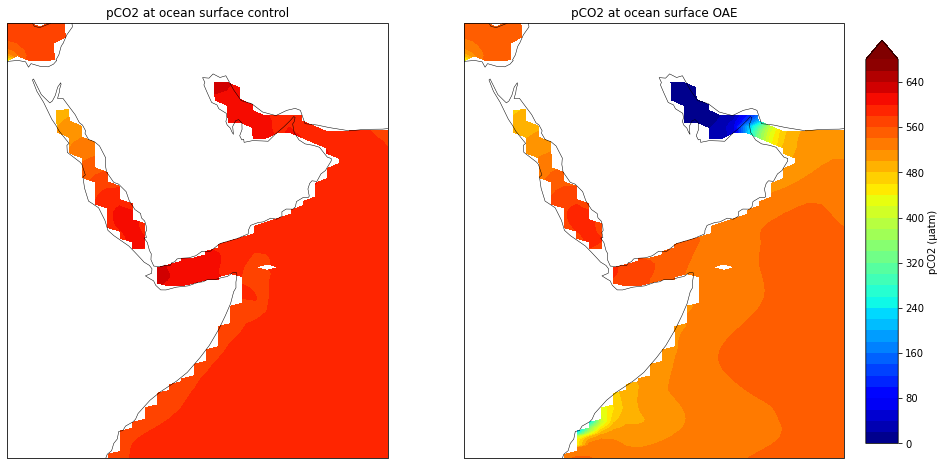

In [27]:
fig = plt.figure(figsize=(15,8))

levels = np.arange(0,700,20)
extent = [30, 65, -5, 35]


ax = fig.add_subplot(1,2,1, projection=ccrs.PlateCarree())
ax.set_extent(extent, ccrs.PlateCarree())
ax.set_title('pCO2 at ocean surface control', fontsize=12)
tmp = ds_ann_ctrl.pCO2SURF
lon, lat, field = utils.adjust_pop_grid(lons, lats,  tmp)
pc=ax.contourf(lon, lat, field, cmap='jet',
               #vmin=0,vmax=5,
               levels=levels,extend='max',
               transform=ccrs.PlateCarree())
ax.coastlines('110m',linewidth=0.5)

ax = fig.add_subplot(1,2,2, projection=ccrs.PlateCarree())
ax.set_extent(extent, ccrs.PlateCarree())
ax.set_title('pCO2 at ocean surface OAE', fontsize=12)
tmp = ds_ann_exp.pCO2SURF
lon, lat, field = utils.adjust_pop_grid(lons, lats,  tmp)
#pc=ax.pcolormesh(lon, lat, field, cmap='jet',vmin=0,vmax=5,transform=ccrs.PlateCarree())
pc=ax.contourf(lon, lat, field, cmap='jet',
               #vmin=0,vmax=5,
               levels=levels,extend='max',
               transform=ccrs.PlateCarree())
ax.coastlines('110m',linewidth=0.5)

cbar_ax = fig.add_axes([0.92, 0.15, 0.03, 0.7])
fig.colorbar(pc, cax=cbar_ax,extend='max', label='pCO2 (µatm)');

fig.savefig('/glade/work/kristenk/figs/OAE_fig_Persian_gulf_pCO2.png', bbox_inches='tight', dpi=300, format='png');

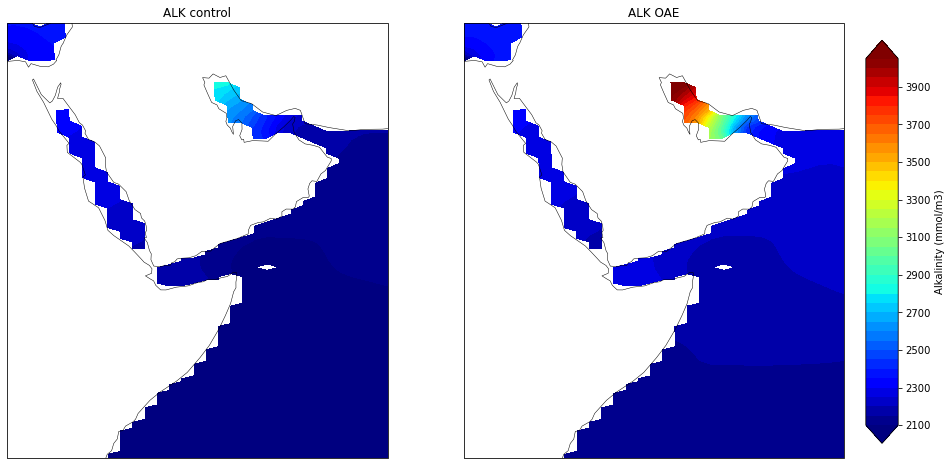

In [28]:
fig = plt.figure(figsize=(15,8))

levels = np.arange(2100,4100,50)

ax = fig.add_subplot(1,2,1, projection=ccrs.PlateCarree())
ax.set_extent(extent, ccrs.PlateCarree())
ax.set_title('ALK control', fontsize=12)
tmp = ds_ann_ctrl.DIC.isel(z_t=0)
lon, lat, field = utils.adjust_pop_grid(lons, lats,  tmp)
pc=ax.contourf(lon, lat, field, cmap='jet',
               #vmin=0,vmax=5,
               levels=levels,extend='both',
               transform=ccrs.PlateCarree())
ax.coastlines('110m',linewidth=0.5)

ax = fig.add_subplot(1,2,2, projection=ccrs.PlateCarree())
ax.set_extent(extent, ccrs.PlateCarree())
ax.set_title('ALK OAE', fontsize=12)
tmp = ds_ann_exp.DIC.isel(z_t=0)
lon, lat, field = utils.adjust_pop_grid(lons, lats,  tmp)
#pc=ax.pcolormesh(lon, lat, field, cmap='jet',vmin=0,vmax=5,transform=ccrs.PlateCarree())
pc=ax.contourf(lon, lat, field, cmap='jet',
               #vmin=0,vmax=5,
               levels=levels,extend='both',
               transform=ccrs.PlateCarree())
ax.coastlines('110m',linewidth=0.5)

cbar_ax = fig.add_axes([0.92, 0.15, 0.03, 0.7])
fig.colorbar(pc, cax=cbar_ax,extend='max', label='Alkalinity (mmol/m3)');

fig.savefig('/glade/work/kristenk/figs/OAE_fig_Persian_gulf_ALK.png', bbox_inches='tight', dpi=300, format='png');

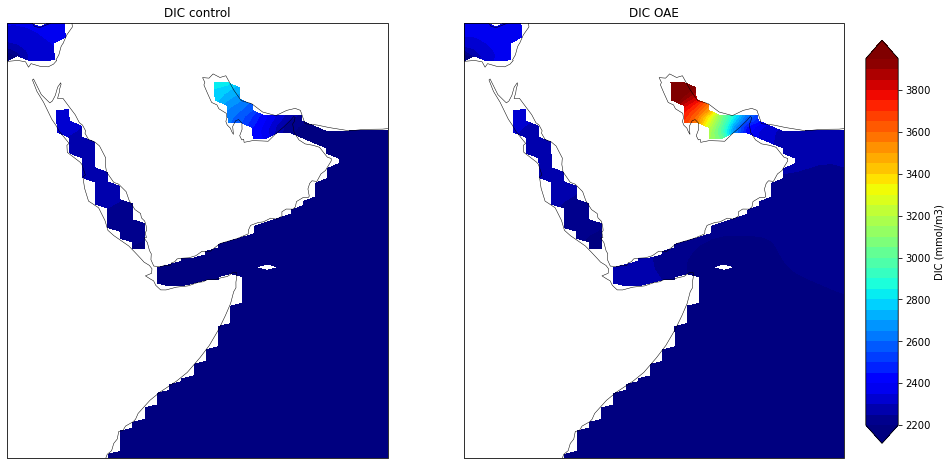

In [29]:
fig = plt.figure(figsize=(15,8))

levels = np.arange(2200,4000,50)

ax = fig.add_subplot(1,2,1, projection=ccrs.PlateCarree())
ax.set_extent(extent, ccrs.PlateCarree())
ax.set_title('DIC control', fontsize=12)
tmp = ds_ann_ctrl.DIC.isel(z_t=0)
lon, lat, field = utils.adjust_pop_grid(lons, lats,  tmp)
pc=ax.contourf(lon, lat, field, cmap='jet',
               #vmin=0,vmax=5,
               levels=levels,extend='both',
               transform=ccrs.PlateCarree())
ax.coastlines('110m',linewidth=0.5)

ax = fig.add_subplot(1,2,2, projection=ccrs.PlateCarree())
ax.set_extent(extent, ccrs.PlateCarree())
ax.set_title('DIC OAE', fontsize=12)
tmp = ds_ann_exp.DIC.isel(z_t=0)
lon, lat, field = utils.adjust_pop_grid(lons, lats,  tmp)
#pc=ax.pcolormesh(lon, lat, field, cmap='jet',vmin=0,vmax=5,transform=ccrs.PlateCarree())
pc=ax.contourf(lon, lat, field, cmap='jet',
               #vmin=0,vmax=5,
               levels=levels,extend='both',
               transform=ccrs.PlateCarree())
ax.coastlines('110m',linewidth=0.5)

cbar_ax = fig.add_axes([0.92, 0.15, 0.03, 0.7])
fig.colorbar(pc, cax=cbar_ax,extend='max', label='DIC (mmol/m3)');

fig.savefig('/glade/work/kristenk/figs/OAE_fig_Persian_gulf_DIC.png', bbox_inches='tight', dpi=300, format='png');

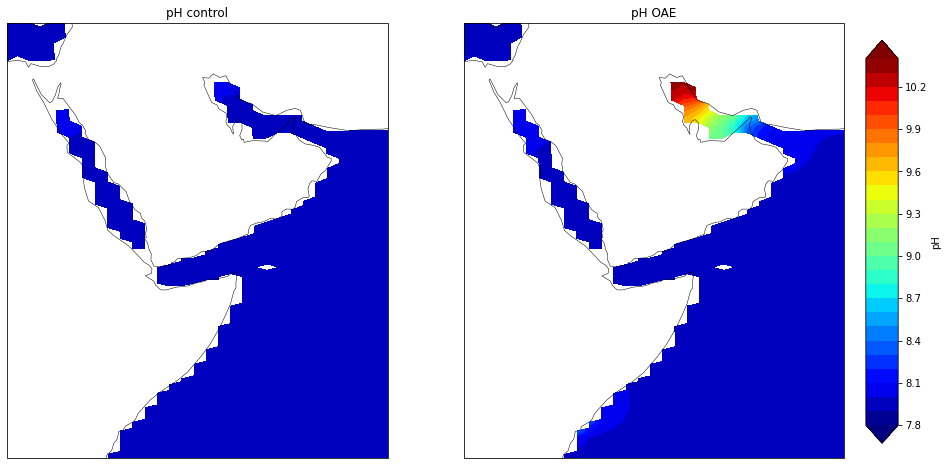

In [30]:
fig = plt.figure(figsize=(15,8))

levels = np.arange(7.8,10.5,0.1)

ax = fig.add_subplot(1,2,1, projection=ccrs.PlateCarree())
ax.set_extent(extent, ccrs.PlateCarree())
ax.set_title('pH control', fontsize=12)
tmp = ds_ann_ctrl.PH
lon, lat, field = utils.adjust_pop_grid(lons, lats,  tmp)
pc=ax.contourf(lon, lat, field, cmap='jet',
               #vmin=0,vmax=5,
               levels=levels,extend='both',
               transform=ccrs.PlateCarree())
ax.coastlines('110m',linewidth=0.5)

ax = fig.add_subplot(1,2,2, projection=ccrs.PlateCarree())
ax.set_extent(extent, ccrs.PlateCarree())
ax.set_title('pH OAE', fontsize=12)
tmp = ds_ann_exp.PH
lon, lat, field = utils.adjust_pop_grid(lons, lats,  tmp)
#pc=ax.pcolormesh(lon, lat, field, cmap='jet',vmin=0,vmax=5,transform=ccrs.PlateCarree())
pc=ax.contourf(lon, lat, field, cmap='jet',
               #vmin=0,vmax=5,
               levels=levels,extend='both',
               transform=ccrs.PlateCarree())
ax.coastlines('110m',linewidth=0.5)

cbar_ax = fig.add_axes([0.92, 0.15, 0.03, 0.7])
fig.colorbar(pc, cax=cbar_ax,extend='max', label='pH');

fig.savefig('/glade/work/kristenk/figs/OAE_fig_Persian_gulf_pH.png', bbox_inches='tight', dpi=300, format='png');

### Plot max Omega aragonite and pH

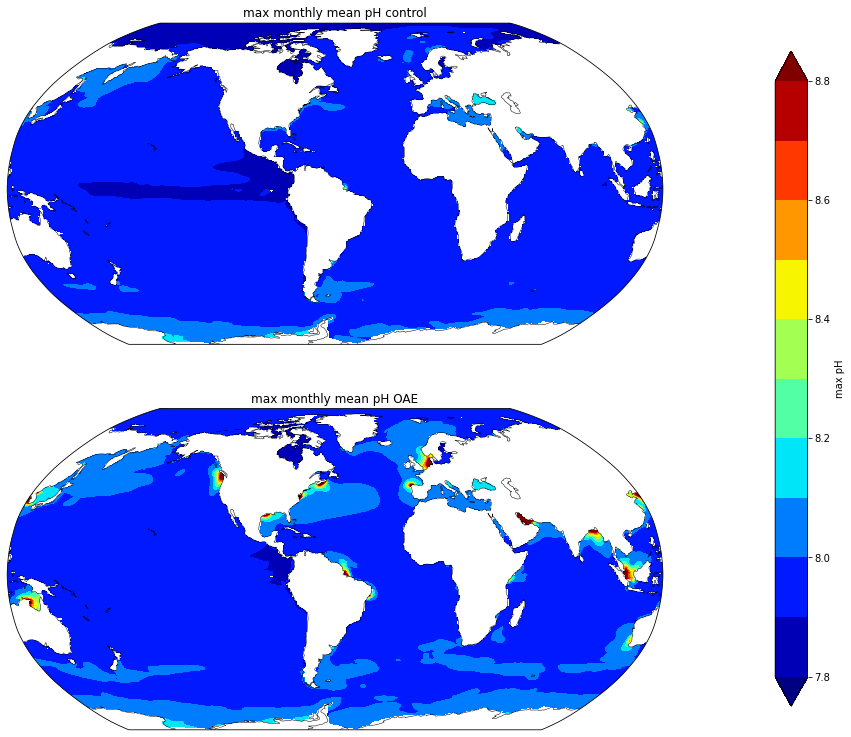

In [31]:
fig = plt.figure(figsize=(15,13))

levels = np.arange(7.8,8.8,0.1)

ax = fig.add_subplot(2,1,1, projection=ccrs.Robinson(central_longitude=305.0))
ax.set_title('max monthly mean pH control', fontsize=12)
tmp = ds_mon_ctrl.PH.max(dim='month')
lon, lat, field = utils.adjust_pop_grid(lons, lats,  tmp)
pc=ax.contourf(lon, lat, field, cmap='jet',
               #vmin=0,vmax=5,
               levels=levels,extend='both',
               transform=ccrs.PlateCarree())
ax.coastlines('110m',linewidth=0.5)

ax = fig.add_subplot(2,1,2, projection=ccrs.Robinson(central_longitude=305.0))
ax.set_title('max monthly mean pH OAE', fontsize=12)
tmp = ds_mon_exp.PH.max(dim='month')
lon, lat, field = utils.adjust_pop_grid(lons, lats,  tmp)
#pc=ax.pcolormesh(lon, lat, field, cmap='jet',vmin=0,vmax=5,transform=ccrs.PlateCarree())
pc=ax.contourf(lon, lat, field, cmap='jet',
               #vmin=0,vmax=5,
               levels=levels,extend='both',
               transform=ccrs.PlateCarree())
ax.coastlines('110m',linewidth=0.5)

cbar_ax = fig.add_axes([0.92, 0.15, 0.03, 0.7])
fig.colorbar(pc, cax=cbar_ax,extend='max', label='max pH');


fig.savefig('/glade/work/kristenk/figs/OAE_fig_max_pH.png', bbox_inches='tight', dpi=300, format='png');

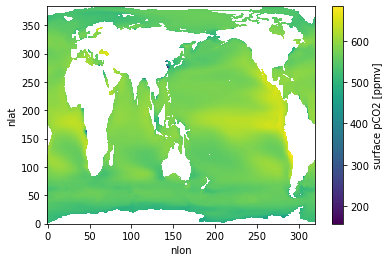

In [32]:
ds_ann_ctrl.pCO2SURF.plot()

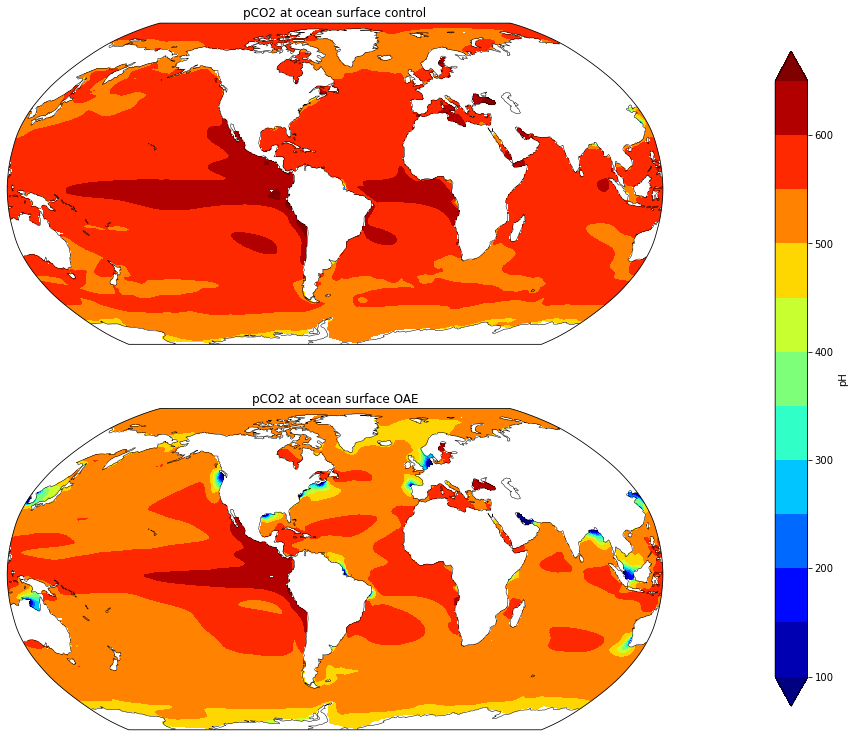

In [33]:
fig = plt.figure(figsize=(15,13))

levels = np.arange(100,700,50)

ax = fig.add_subplot(2,1,1, projection=ccrs.Robinson(central_longitude=305.0))
ax.set_title('pCO2 at ocean surface control', fontsize=12)
tmp = ds_ann_ctrl.pCO2SURF
lon, lat, field = utils.adjust_pop_grid(lons, lats,  tmp)
pc=ax.contourf(lon, lat, field, cmap='jet',
               #vmin=0,vmax=5,
               levels=levels,extend='both',
               transform=ccrs.PlateCarree())
ax.coastlines('110m',linewidth=0.5)

ax = fig.add_subplot(2,1,2, projection=ccrs.Robinson(central_longitude=305.0))
ax.set_title('pCO2 at ocean surface OAE', fontsize=12)
tmp = ds_ann_exp.pCO2SURF
lon, lat, field = utils.adjust_pop_grid(lons, lats,  tmp)
#pc=ax.pcolormesh(lon, lat, field, cmap='jet',vmin=0,vmax=5,transform=ccrs.PlateCarree())
pc=ax.contourf(lon, lat, field, cmap='jet',
               #vmin=0,vmax=5,
               levels=levels,extend='both',
               transform=ccrs.PlateCarree())
ax.coastlines('110m',linewidth=0.5)

cbar_ax = fig.add_axes([0.92, 0.15, 0.03, 0.7])
fig.colorbar(pc, cax=cbar_ax,extend='max', label='pH');

fig.savefig('/glade/work/kristenk/figs/OAE_fig_pCO2.png', bbox_inches='tight', dpi=300, format='png');

### Plot mean and delta CaCO3 prod

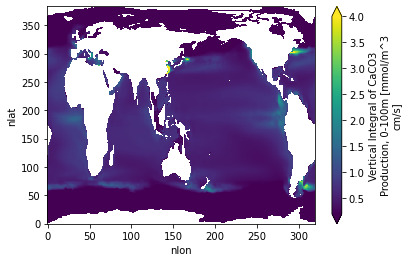

In [34]:
(ds_ann_exp.CaCO3_PROD_zint_100m * 0.01 * 86400).plot(vmin=0.2,vmax=4)

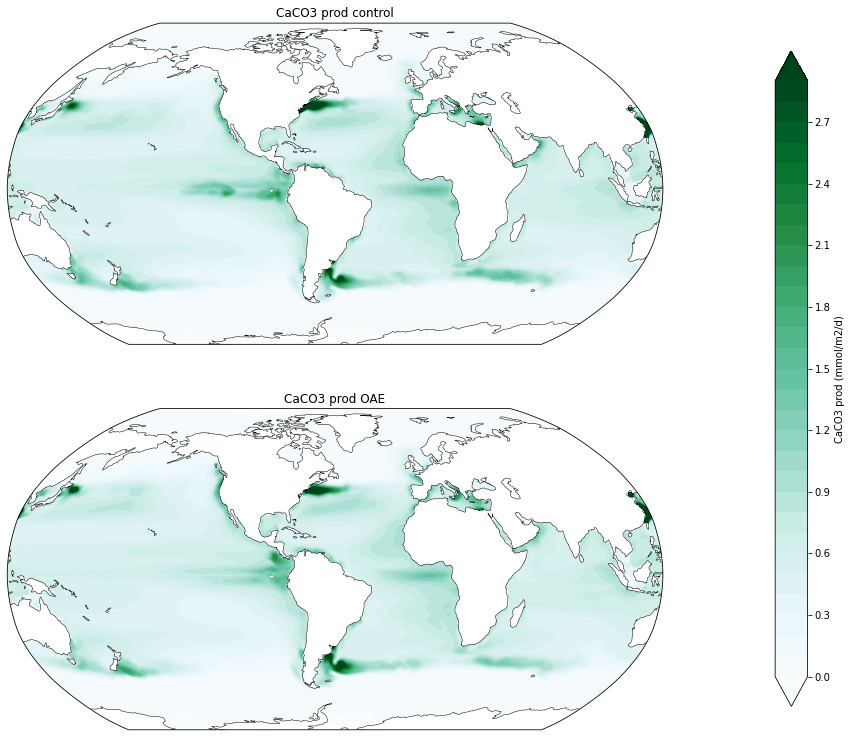

In [39]:
fig = plt.figure(figsize=(15,13))

levels = np.arange(0,3,0.1)

ax = fig.add_subplot(2,1,1, projection=ccrs.Robinson(central_longitude=305.0))
ax.set_title('CaCO3 prod control', fontsize=12)
tmp = ds_ann_ctrl.CaCO3_PROD_zint_100m * 0.01 * 86400
lon, lat, field = utils.adjust_pop_grid(lons, lats,  tmp)
pc=ax.contourf(lon, lat, field, cmap='BuGn',
               #vmin=0,vmax=5,
               levels=levels,extend='both',
               transform=ccrs.PlateCarree())
ax.coastlines('110m',linewidth=0.5)

ax = fig.add_subplot(2,1,2, projection=ccrs.Robinson(central_longitude=305.0))
ax.set_title('CaCO3 prod OAE', fontsize=12)
tmp = ds_ann_exp.CaCO3_PROD_zint_100m * 0.01 * 86400
lon, lat, field = utils.adjust_pop_grid(lons, lats,  tmp)
pc=ax.contourf(lon, lat, field, cmap='BuGn',
               #vmin=0,vmax=5,
               levels=levels,extend='both',
               transform=ccrs.PlateCarree())
ax.coastlines('110m',linewidth=0.5)

cbar_ax = fig.add_axes([0.92, 0.15, 0.03, 0.7])
fig.colorbar(pc, cax=cbar_ax,extend='max', label='CaCO3 prod (mmol/m2/d)');

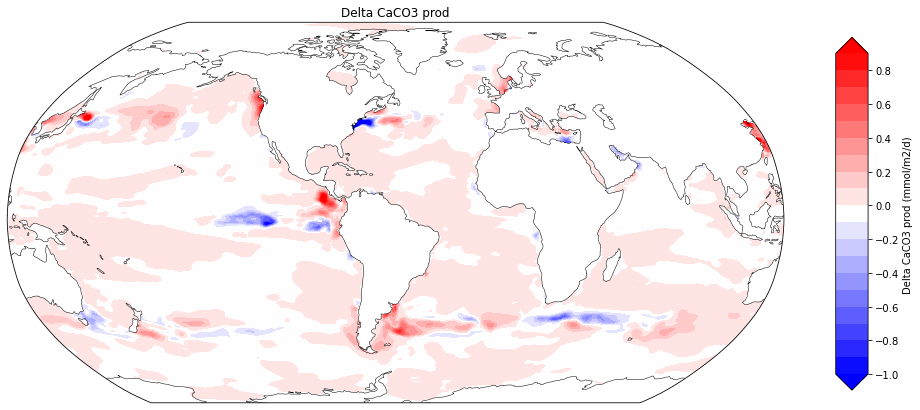

In [40]:
fig = plt.figure(figsize=(15,7))

levels = np.arange(-1,1,0.1)

ax = fig.add_subplot(1,1,1, projection=ccrs.Robinson(central_longitude=305.0))
ax.set_title('Delta CaCO3 prod', fontsize=12)
tmp = (ds_ann_exp.CaCO3_PROD_zint_100m - ds_ann_ctrl.CaCO3_PROD_zint_100m) * 0.01 * 86400
lon, lat, field = utils.adjust_pop_grid(lons, lats,  tmp)
pc=ax.contourf(lon, lat, field, cmap='bwr',
               #vmin=0,vmax=5,
               levels=levels,extend='both',
               transform=ccrs.PlateCarree())
ax.coastlines('110m',linewidth=0.5)

cbar_ax = fig.add_axes([0.92, 0.15, 0.03, 0.7])
fig.colorbar(pc, cax=cbar_ax,extend='max', label='Delta CaCO3 prod (mmol/m2/d)');

### cocco biomass and picpoc

In [37]:
## integrate biomass and caco3
        
attrs = ds_ann_exp['coccoC'].attrs
ds_ann_exp['coccoC']= (ds_ann_exp['coccoC'].isel(z_t_150m=slice(0,10))*10.).sum(dim='z_t_150m')
ds_ann_exp['coccoC'].attrs = attrs
ds_ann_exp['coccoC'].attrs['units'] = 'mmol/m^2'

attrs = ds_ann_exp['coccoCaCO3'].attrs
ds_ann_exp['coccoCaCO3']= (ds_ann_exp['coccoCaCO3'].isel(z_t_150m=slice(0,10))*10.).sum(dim='z_t_150m')
ds_ann_exp['coccoCaCO3'].attrs = attrs
ds_ann_exp['coccoCaCO3'].attrs['units'] = 'mmol/m^2'

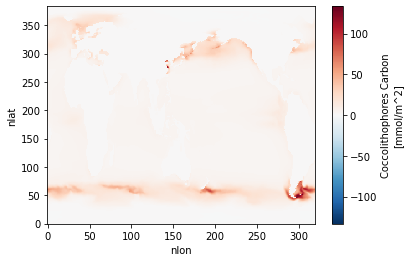

In [38]:
ds_ann_exp['coccoC'].plot()

In [39]:
## integrate biomass and caco3
        
attrs = ds_ann_ctrl['coccoC'].attrs
ds_ann_ctrl['coccoC']= (ds_ann_ctrl['coccoC'].isel(z_t_150m=slice(0,10))*10.).sum(dim='z_t_150m')
ds_ann_ctrl['coccoC'].attrs = attrs
ds_ann_ctrl['coccoC'].attrs['units'] = 'mmol/m^2'

attrs = ds_ann_ctrl['coccoCaCO3'].attrs
ds_ann_ctrl['coccoCaCO3']= (ds_ann_ctrl['coccoCaCO3'].isel(z_t_150m=slice(0,10))*10.).sum(dim='z_t_150m')
ds_ann_ctrl['coccoCaCO3'].attrs = attrs
ds_ann_ctrl['coccoCaCO3'].attrs['units'] = 'mmol/m^2'

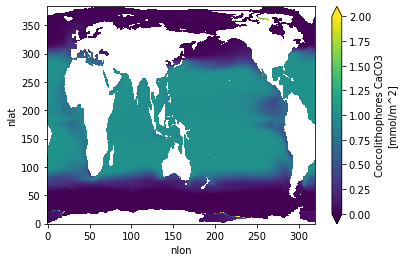

In [30]:
cocco_picpoc_ctrl = ds_ann_ctrl.coccoCaCO3/ds_ann_ctrl.coccoC
cocco_picpoc_ctrl.plot(vmin=0,vmax=2)

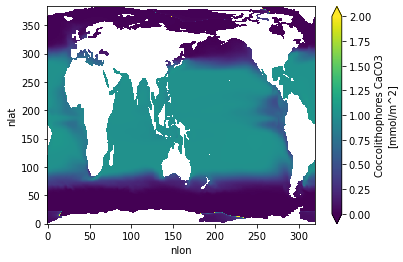

In [31]:
cocco_picpoc_exp = ds_ann_exp.coccoCaCO3/ds_ann_exp.coccoC
cocco_picpoc_exp.plot(vmin=0,vmax=2)

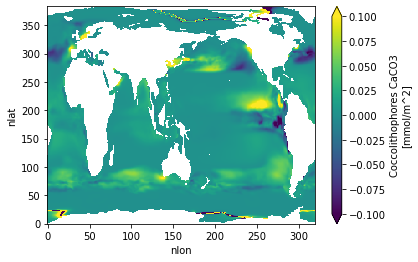

In [32]:
(cocco_picpoc_exp - cocco_picpoc_ctrl).plot(vmin=-0.1,vmax=0.1)

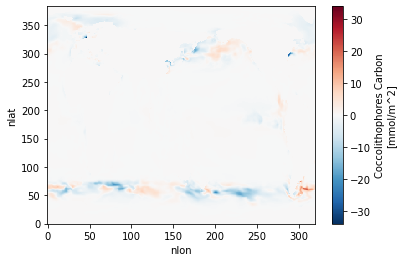

In [34]:
(ds_ann_exp.coccoC - ds_ann_ctrl.coccoC).plot()

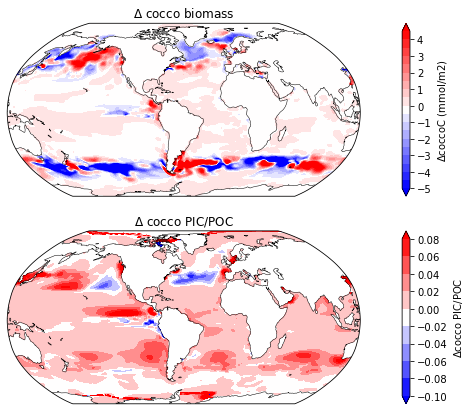

In [38]:
fig = plt.figure(figsize=(15,7))

levels = np.arange(-5,5,0.5)

ax = fig.add_subplot(2,1,1, projection=ccrs.Robinson(central_longitude=305.0))
ax.set_title('${\Delta}$ cocco biomass', fontsize=12)
tmp = (ds_ann_exp.coccoC - ds_ann_ctrl.coccoC)
lon, lat, field = utils.adjust_pop_grid(lons, lats,  tmp)
pc=ax.contourf(lon, lat, field, cmap='bwr',
               levels=levels,extend='both',
               transform=ccrs.PlateCarree())
ax.coastlines('110m',linewidth=0.5)

fig.colorbar(pc,extend='max', label='${\Delta}$coccoC (mmol/m2)');

ax = fig.add_subplot(2,1,2, projection=ccrs.Robinson(central_longitude=305.0))
ax.set_title('${\Delta}$ cocco PIC/POC', fontsize=12)
tmp = (cocco_picpoc_exp - cocco_picpoc_ctrl)
lon, lat, field = utils.adjust_pop_grid(lons, lats,  tmp)
pc=ax.contourf(lon, lat, field, cmap='bwr',
               levels=np.arange(-0.1,0.1,0.02),extend='both',
               transform=ccrs.PlateCarree())
ax.coastlines('110m',linewidth=0.5)

fig.colorbar(pc,extend='both', label='${\Delta}$cocco PIC/POC');

In [19]:
months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

In [20]:
ds_mon_ctrl

<xarray.Dataset>
Dimensions:               (d2: 2, nlat: 384, nlon: 320, time: 12, z_t: 60, z_t_150m: 15)
Coordinates:
  * z_t                   (z_t) float32 500.0 1.5e+03 ... 5.125e+05 5.375e+05
  * z_t_150m              (z_t_150m) float32 500.0 1.5e+03 ... 1.35e+04 1.45e+04
  * time                  (time) object 2099-01-16 12:00:00 ... 2099-12-16 12...
Dimensions without coordinates: d2, nlat, nlon
Data variables: (12/16)
    time_bound            (time, d2) object dask.array<chunksize=(1, 2), meta=np.ndarray>
    dz                    (time, z_t) float32 dask.array<chunksize=(1, 60), meta=np.ndarray>
    TLONG                 (time, nlat, nlon) float64 dask.array<chunksize=(1, 384, 320), meta=np.ndarray>
    TLAT                  (time, nlat, nlon) float64 dask.array<chunksize=(1, 384, 320), meta=np.ndarray>
    KMT                   (time, nlat, nlon) float64 dask.array<chunksize=(1, 384, 320), meta=np.ndarray>
    REGION_MASK           (time, nlat, nlon) float64 dask.array<chunksize=(1, 384, 320), meta=np.ndarray>
    ...                    ...
    CaCO3_PROD_zint_100m  (time, nlat, nlon) float32 dask.array<chunksize=(1, 384, 320), meta=np.ndarray>
    PH                    (time, nlat, nlon) float32 dask.array<chunksize=(1, 384, 320), meta=np.ndarray>
    ALK                   (time, z_t, nlat, nlon) float32 dask.array<chunksize=(1, 60, 384, 320), meta=np.ndarray>
    diatC                 (time, z_t_150m, nlat, nlon) float32 dask.array<chunksize=(1, 15, 384, 320), meta=np.ndarray>
    coccoC                (time, z_t_150m, nlat, nlon) float32 dask.array<chunksize=(1, 15, 384, 320), meta=np.ndarray>
    coccoCaCO3            (time, z_t_150m, nlat, nlon) float32 dask.array<chunksize=(1, 15, 384, 320), meta=np.ndarray>
Attributes:
    title:             b.e21.BSSP245.f09_g17.ccisens-const25lu-final.esmfireb...
    history:           none
    Conventions:       CF-1.0; http://www.cgd.ucar.edu/cms/eaton/netcdf/CF-cu...
    time_period_freq:  month_1
    model_doi_url:     https://doi.org/10.5065/D67H1H0V
    contents:          Diagnostic and Prognostic Variables
    source:            CCSM POP2, the CCSM Ocean Component
    revision:          $Id$
    calendar:          All years have exactly  365 days.
    start_time:        This dataset was created on 2025-08-21 at 17:44:44.4
    cell_methods:      cell_methods = time: mean ==> the variable values are ...

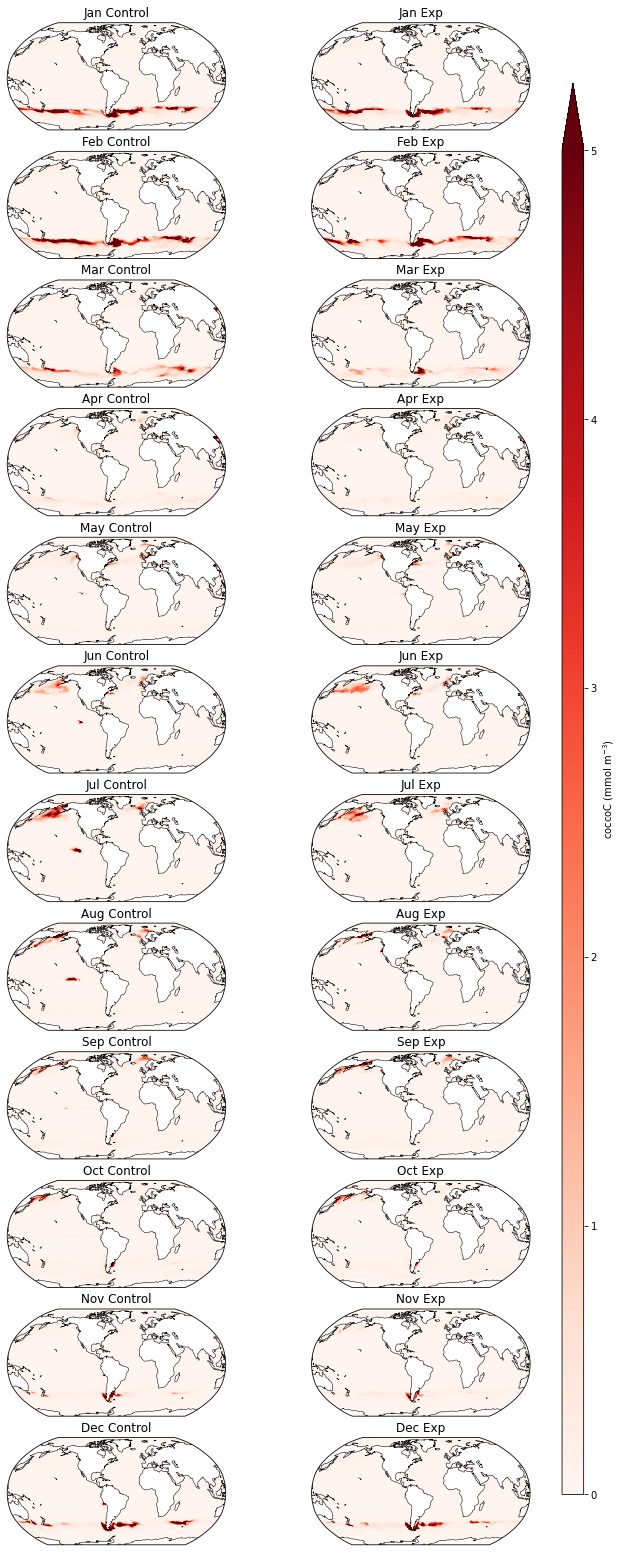

In [21]:
fig = plt.figure(figsize=(10,28))

for row in np.arange(1,13):
    
    ts=row-1
    
    plot = row*2 - 1
    ax = fig.add_subplot(12,2,plot, projection=ccrs.Robinson(central_longitude=305.0))
    ax.set_title(months[ts]+' Control', fontsize=12)
    tmp = ds_mon_ctrl.coccoC.isel(z_t_150m=0,time=ts)
    lon, lat, field = utils.adjust_pop_grid(lons, lats,  tmp)
    pc=ax.pcolormesh(lon, lat, field, cmap='Reds',vmin=0,vmax=5,transform=ccrs.PlateCarree())
    ax.coastlines('110m',linewidth=0.5)
    
    plot = row*2
    ax = fig.add_subplot(12,2,plot, projection=ccrs.Robinson(central_longitude=305.0))
    ax.set_title(months[ts]+' Exp', fontsize=12)
    tmp = ds_mon_exp.coccoC.isel(z_t_150m=0,time=ts)
    lon, lat, field = utils.adjust_pop_grid(lons, lats,  tmp)
    pc=ax.pcolormesh(lon, lat, field, cmap='Reds',vmin=0,vmax=5,transform=ccrs.PlateCarree())
    ax.coastlines('110m',linewidth=0.5)

cbar_ax = fig.add_axes([0.92, 0.15, 0.03, 0.7])
fig.colorbar(pc, cax=cbar_ax,extend='max', label='coccoC (mmol m$^{-3}$)');

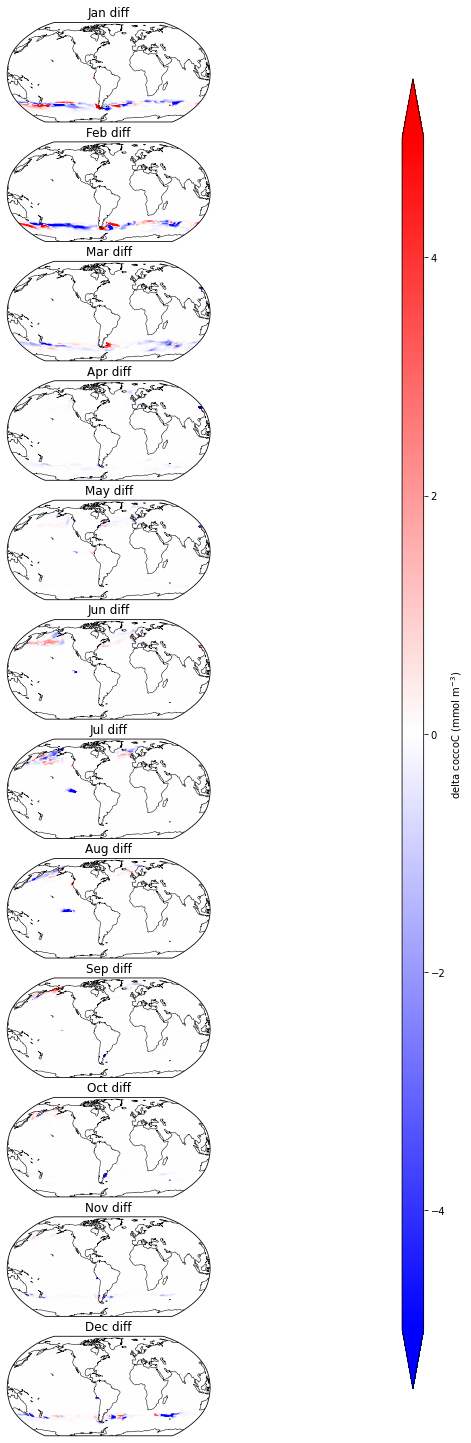

In [22]:
fig = plt.figure(figsize=(10,26))

for row in np.arange(1,13):
    
    ts=row-1
    
    plot = row
    ax = fig.add_subplot(12,1,plot, projection=ccrs.Robinson(central_longitude=305.0))
    ax.set_title(months[ts]+' diff', fontsize=12)
    tmp = ds_mon_exp.coccoC.isel(z_t_150m=0,time=ts)-ds_mon_ctrl.coccoC.isel(z_t_150m=0,time=ts) 
    lon, lat, field = utils.adjust_pop_grid(lons, lats,  tmp)
    pc=ax.pcolormesh(lon, lat, field, cmap='bwr',
                     vmin=-5,vmax=5,
                     transform=ccrs.PlateCarree())
    ax.coastlines('110m',linewidth=0.5)
    

cbar_ax = fig.add_axes([0.92, 0.15, 0.03, 0.7])
fig.colorbar(pc, cax=cbar_ax,extend='both', label='delta coccoC (mmol m$^{-3}$)');

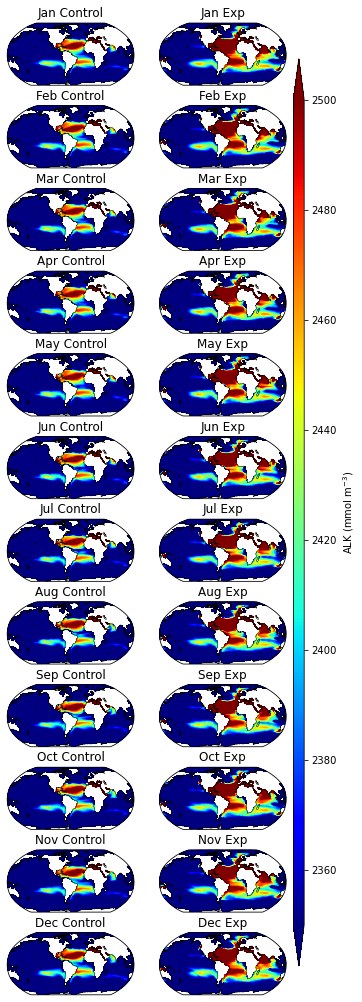

In [24]:
fig = plt.figure(figsize=(5,18))

for row in np.arange(1,13):
    
    ts=row-1
    
    plot = row*2 - 1
    ax = fig.add_subplot(12,2,plot, projection=ccrs.Robinson(central_longitude=305.0))
    ax.set_title(months[ts]+' Control', fontsize=12)
    tmp = ds_mon_ctrl.ALK.isel(z_t=0,time=ts)
    lon, lat, field = utils.adjust_pop_grid(lons, lats,  tmp)
    pc=ax.pcolormesh(lon, lat, field, cmap='jet',
                     vmin=2350,vmax=2500,
                     transform=ccrs.PlateCarree())
    ax.coastlines('110m',linewidth=0.5)
    
    plot = row*2
    ax = fig.add_subplot(12,2,plot, projection=ccrs.Robinson(central_longitude=305.0))
    ax.set_title(months[ts]+' Exp', fontsize=12)
    tmp = ds_mon_exp.ALK.isel(z_t=0,time=ts)
    lon, lat, field = utils.adjust_pop_grid(lons, lats,  tmp)
    pc=ax.pcolormesh(lon, lat, field, cmap='jet',
                     vmin=2350,vmax=2500,
                     transform=ccrs.PlateCarree())
    ax.coastlines('110m',linewidth=0.5)

cbar_ax = fig.add_axes([0.92, 0.15, 0.03, 0.7])
fig.colorbar(pc, cax=cbar_ax,extend='both', label='ALK (mmol m$^{-3}$)');

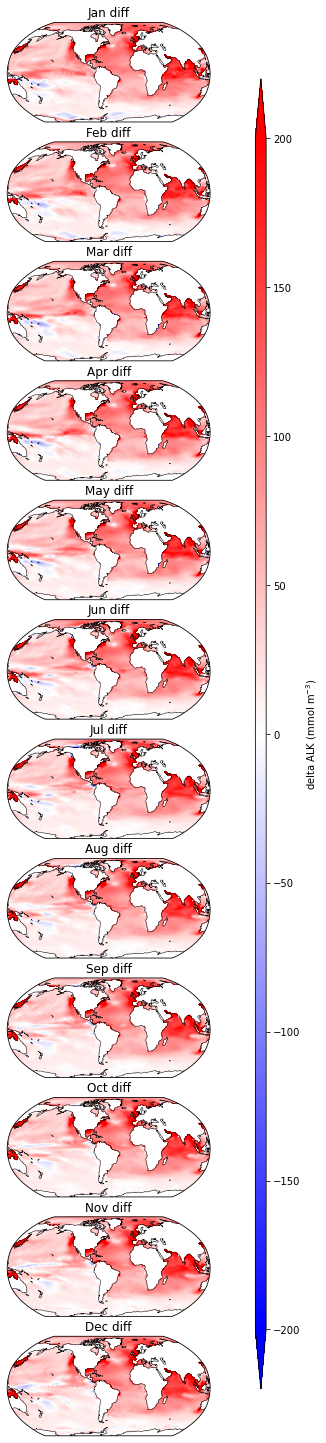

In [26]:
fig = plt.figure(figsize=(5,26))

for row in np.arange(1,13):
    
    ts=row-1
    
    plot = row
    ax = fig.add_subplot(12,1,plot, projection=ccrs.Robinson(central_longitude=305.0))
    ax.set_title(months[ts]+' diff', fontsize=12)
    tmp = ds_mon_exp.ALK.isel(z_t=0,time=ts)-ds_mon_ctrl.ALK.isel(z_t=0,time=ts) 
    lon, lat, field = utils.adjust_pop_grid(lons, lats,  tmp)
    pc=ax.pcolormesh(lon, lat, field, cmap='bwr',
                     vmin=-200,vmax=200,
                     transform=ccrs.PlateCarree())
    ax.coastlines('110m',linewidth=0.5)
    

cbar_ax = fig.add_axes([0.92, 0.15, 0.03, 0.7])
fig.colorbar(pc, cax=cbar_ax,extend='both', label='delta ALK (mmol m$^{-3}$)');

### Do we need dask?

In [18]:
def get_ClusterClient():
    import dask
    from dask_jobqueue import PBSCluster
    from dask.distributed import Client
    cluster = PBSCluster(
        cores=2,
        memory='20 GB',
        processes=1,
        queue='casper',
        resource_spec='select=1:ncpus=1:mem=20GB',
        project='NCGD0011',
        walltime='05:00:00',
        interface='ext',)

    dask.config.set({
        'distributed.dashboard.link':
        'https://jupyterhub.hpc.ucar.edu/stable/user/{USER}/proxy/{port}/status'
    })
    client = Client(cluster)
    return cluster, client

In [19]:
# cluster, client = get_ClusterClient()
# cluster.scale(18) 
# client

### Put datasets in a dictionary

In [20]:
ds_dict = {}

ds_dict['5Tmol_exp'] = ds_mon_exp
ds_dict['control'] = ds_mon_ctrl

### Integrate phytoplankton vars

### make top 100m of environmental variables

In [22]:
%%time
for ds_name in ['5Tmol_exp','control']:

    ds = ds_dict[ds_name]

    # attrs = ds['TEMP'].attrs
    # ds['TEMP']= (ds['TEMP'].isel(z_t=slice(0,10))).mean(dim='z_t') # top 100m mean
    # ds['TEMP'].attrs = attrs
    # ds['TEMP'].attrs['long_name'] = 'top 100 m mean temperature'
    
    # print('temp done')
    
    attrs = ds['ALK'].attrs
    ds['ALK']= (ds['ALK'].isel(z_t=slice(0,10))).mean(dim='z_t') # top 100m mean
    ds['ALK'].attrs = attrs
    ds['ALK'].attrs['long_name'] = 'top 100 m mean total alkalinity'
    
    # print('dic done')
    
    # attrs = ds_fosi['Fe'].attrs
    # ds_fosi['Fe']= (ds_fosi['Fe'].isel(z_t=slice(0,10))).mean(dim='z_t') # top 100m mean
    # ds_fosi['Fe'].attrs = attrs
    # ds_fosi['Fe'].attrs['long_name'] = 'top 100 m mean dissolved inorganic iron'
    
    # print('fe done')
    
    attrs = ds['NO3'].attrs
    ds['NO3']= (ds['NO3'].isel(z_t=slice(0,10))).mean(dim='z_t') # top 100m mean
    ds['NO3'].attrs = attrs
    ds['NO3'].attrs['long_name'] = 'top 100 m mean dissolved inorganic nitrate'
    
    
    attrs = ds['SALT'].attrs
    ds['SALT']= (ds['SALT'].isel(z_t=slice(0,10))).mean(dim='z_t') # top 100m mean
    ds['SALT'].attrs = attrs
    ds['SALT'].attrs['long_name'] = 'top 100 m mean dissolved inorganic nitrate'

    ds_dict[ds_name] = ds

CPU times: user 24.4 ms, sys: 3.94 ms, total: 28.3 ms
Wall time: 28.9 ms


In [23]:
#ds = ds_dict[ds]

### Make annual means

In [24]:
%%time
for ds_name in ['5Tmol_exp','control']:

    ds = ds_dict[ds_name]

    ds_ann = ds.resample({'time':'A'}).mean(dim='time').compute()

    ds_dict[ds_name+'_ann'] = ds_ann

CPU times: user 2 s, sys: 3.8 s, total: 5.8 s
Wall time: 15.9 s


In [25]:
ds_dict.keys()

dict_keys(['5Tmol_exp', 'control', '5Tmol_exp_ann', 'control_ann'])

In [26]:
ds_diff = xr.Dataset()

ds_diff = ds_dict['5Tmol_exp_ann'] - ds_dict['control_ann']

In [27]:
# ones = np.full((384,320),1,dtype=int)
# ones = xr.DataArray(ones,dims=('nlat','nlon'))
# ones = ones.where(ds_grid.REGION_MASK>0)

In [28]:
#ds['PAlk'] = (ds.ALK + 1.36 * ds.NO3)* (35./ds.SALT)

In [29]:
#ds['sAlk'] = (ds.ALK)* (35./ds.SALT)

In [30]:
#ds.time[0:120]
#ds.time[-120:1032]

In [31]:
ds_diff = ds_diff.load()

In [32]:
ds_diff.coccoC

<xarray.DataArray 'coccoC' (time: 1, nlat: 384, nlon: 320)>
array([[[ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [-0.00037333, -0.00037066, -0.00036922, ...,  0.        ,
          0.        ,  0.        ],
        ...,
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ]]], dtype=float32)
Coordinates:
  * time     (time) object 2015-12-31 00:00:00
Dimensions without coordinates: nlat, nlon

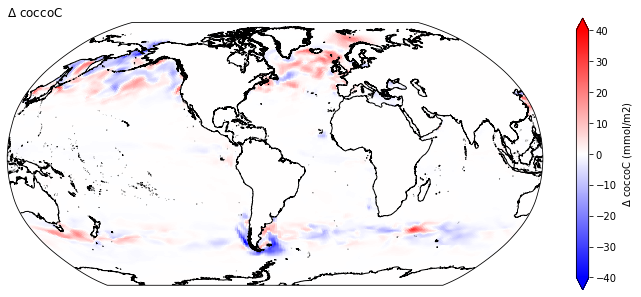

In [33]:
fig = plt.figure(figsize=(12,5))

############### 
ax = fig.add_subplot(1,1,1, projection=ccrs.Robinson(central_longitude=305.0))
#ax.set_extent([-180, 180, -90, -30], ccrs.PlateCarree())
ax.set_title('${\Delta}$ coccoC', loc='left')


lon,lat,field = utils.adjust_pop_grid(lons, lats, ds_diff.coccoC.squeeze())

pc = ax.pcolormesh(lon,lat,field,
                    transform=ccrs.PlateCarree(),cmap='bwr',vmin=-40,vmax=40)


ax.coastlines('10m',linewidth=1)
fig.colorbar(pc,extend='both', label='${\Delta}$ coccoC (mmol/m2)');

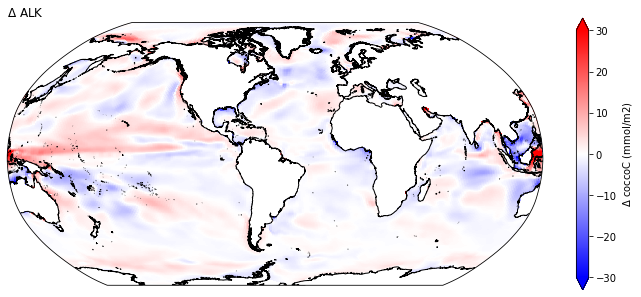

In [34]:
fig = plt.figure(figsize=(12,5))

############### 
ax = fig.add_subplot(1,1,1, projection=ccrs.Robinson(central_longitude=305.0))
#ax.set_extent([-180, 180, -90, -30], ccrs.PlateCarree())
ax.set_title('${\Delta}$ ALK', loc='left')


lon,lat,field = utils.adjust_pop_grid(lons, lats, ds_diff.ALK.squeeze())

pc = ax.pcolormesh(lon,lat,field,
                    transform=ccrs.PlateCarree(),cmap='bwr',vmin=-30,vmax=30)


ax.coastlines('10m',linewidth=1)
fig.colorbar(pc,extend='both', label='${\Delta}$ coccoC (mmol/m2)');